In [1]:
import numpy as np
import scipy.stats as spstats
import matplotlib.pyplot as plt

In [2]:
def covMatrix(sig1,sig2,rho):
    """return a numpy array containing the covariance matrix described by
    sig1: the marginal standard deviation of the x variable
    sig2: the marginal standard deviation of the y variable
    rho:  the correlation coefficient between x and y variables"""

    return np.asarray([[sig1**2, sig1 * sig2 * rho], [sig1 * sig2 * rho, sig2**2]])


In [3]:
def plotSamples(ax,mean,sigma):
    """generates samples from a multivariate normal distributions with given mean and covariance matrix,
    plot them in ax."""
    samples = np.random.multivariate_normal(mean,sigma,50) #sample
    #TODO2: plot the x and y values of the generated samples in axis ax using the plot command.
    #       plot each datapoint as a dot (that is, do not connect the dots with lines)
    #       store the output of the plot command as h (this handle allows adding the graph in the legend)

    h = ax.plot(samples[:,0],samples[:,1],'o')
    return h[0]

In [4]:
def plotDensityContours(ax,mean,sigma):
    """plot a contour plot of the multivariate normal distribution with given mean and covariance matrix in ax """
    x = np.linspace(-3, 3, 50)
    y = np.linspace(-3, 3, 50)

    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)

    for xidx in range(X.shape[0]):
        for yidx in range(X.shape[1]):
            Z[xidx, yidx] = spstats.multivariate_normal.pdf([X[xidx,yidx],Y[xidx,yidx]],mean,sigma)


    CS = ax.contour(X,Y,Z)
    ax.clabel(CS, inline=1, fontsize=8)


In [5]:
def doplots(means, covs, names):
    """take a list of three mean vectors, three covariance matrices, and three names, and plot them.
    The samples will be plotted with different colors in the same plot.
    The contours will be plotted in different subplot each."""
    fig1 = plt.figure()
    ax = fig1.add_subplot(111)
    h1 = plotSamples(ax,means[0],covs[0])
    h2 = plotSamples(ax,means[1],covs[1])
    h3 = plotSamples(ax,means[2],covs[2])
    ax.legend([h1,h2,h3],names)
    ax.axis('equal')
    plt.show()

    fig1 = plt.figure(figsize=[14.4,4.8])
    ax = fig1.add_subplot(131)
    plotDensityContours(ax,means[0],covs[0])
    ax.axis('equal')
    ax.set_title(names[0])

    ax = fig1.add_subplot(132)
    plotDensityContours(ax,means[1],covs[1])
    ax.axis('equal')
    ax.set_title(names[1])

    ax = fig1.add_subplot(133)
    plotDensityContours(ax,means[2],covs[2])
    ax.axis('equal')
    ax.set_title(names[2])

    plt.show()

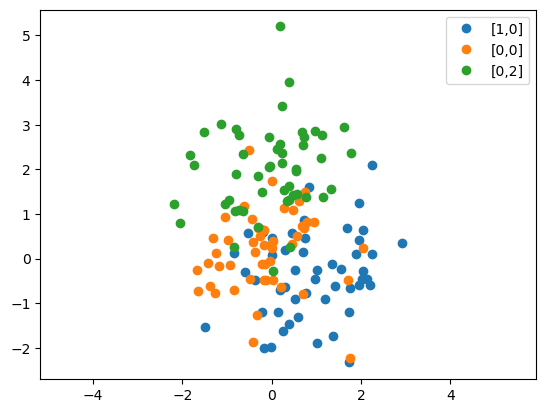

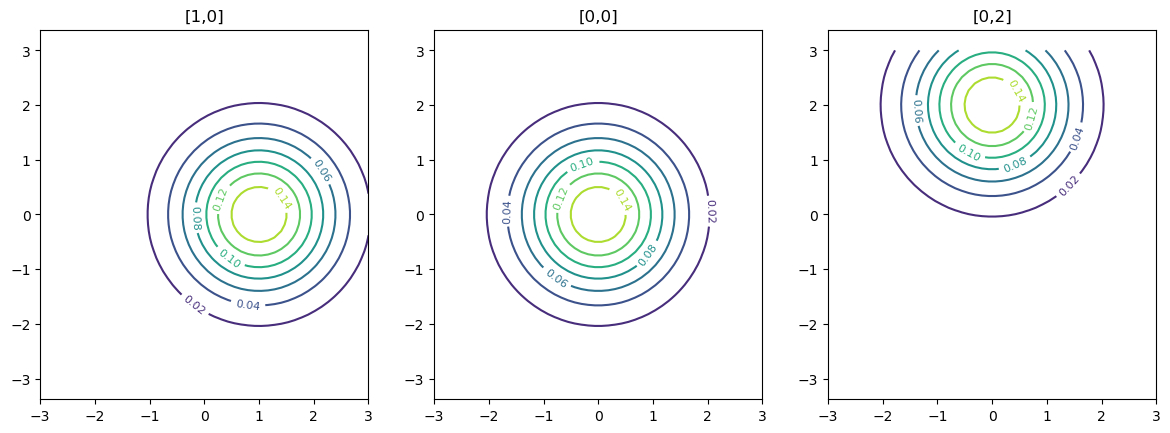

In [6]:
#TODO 3: plot multi-variate normal distributions with the identity matrix as covariance,
#        and means [1,0],[0,0], and [0,2].

doplots([[1,0],[0,0],[0,2]],[np.eye(2)]*3,["[1,0]","[0,0]","[0,2]"])

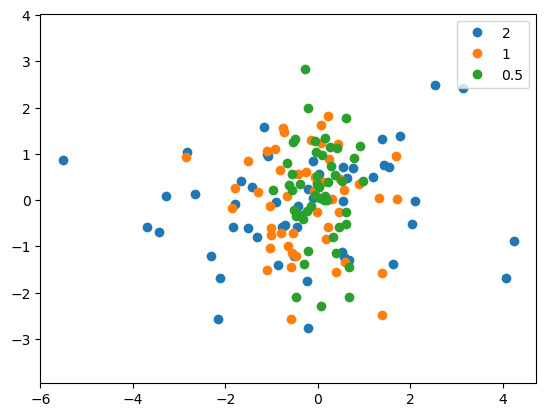

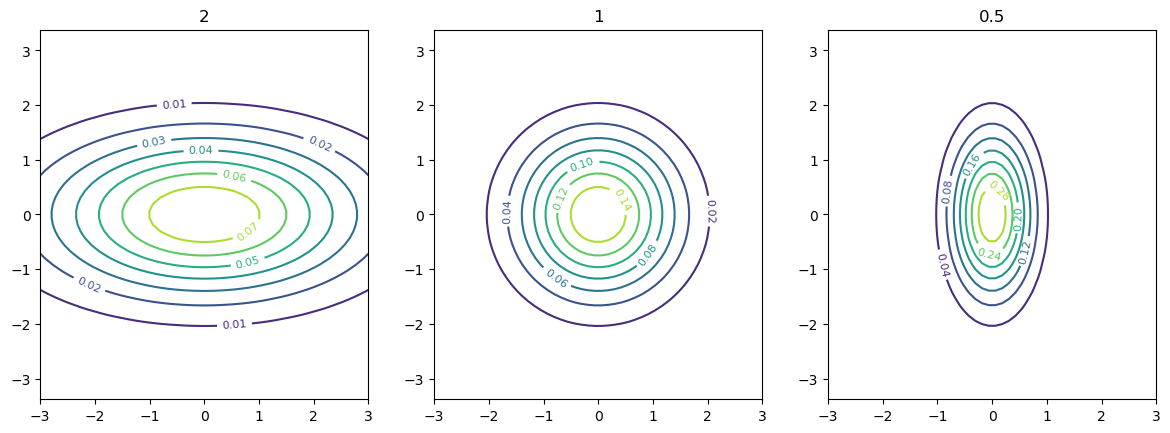

In [7]:
#TODO 4: plot multi-variate normal distributions with [0,0] as mean,
#        and with sigma_1 2,1,or 0.5. (keep the values sigma_2=1 and rho=0 )

cov1 = covMatrix(2,1,0)
cov2 = covMatrix(1,1,0)
cov3 = covMatrix(0.5,1,0)

doplots([[0,0],[0,0],[0,0]], [cov1, cov2, cov3], ["2", "1", "0.5"])



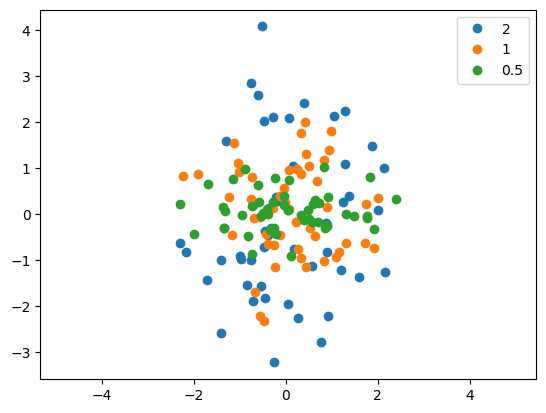

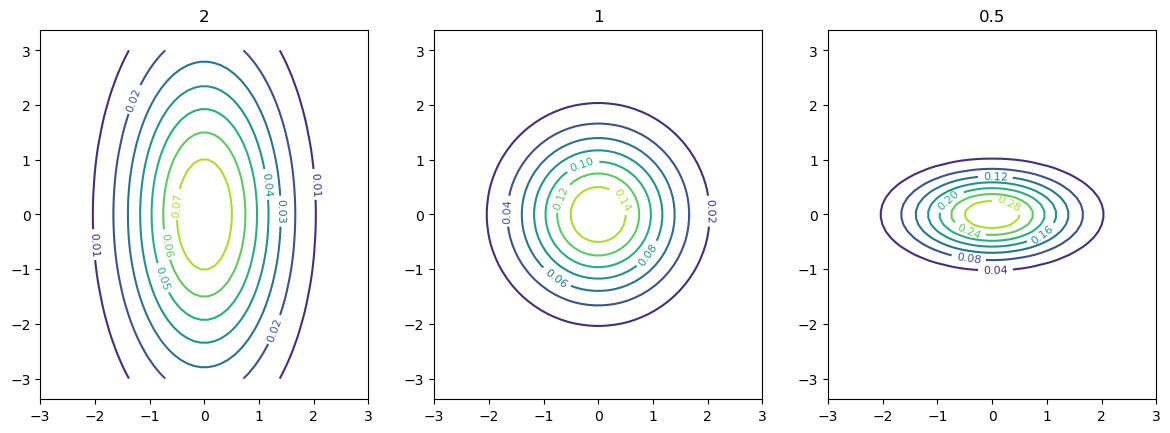

In [8]:
#TODO 5: plot multi-variate normal distributions with [0,0] as mean,
#        and with sigma_2 2,1,or 0.5. (keep the values sigma_1=1 and rho=0 )

cov1 = covMatrix(1,2,0)
cov2 = covMatrix(1,1,0)
cov3 = covMatrix(1,0.5,0)

doplots([[0,0],[0,0],[0,0]], [cov1, cov2, cov3], ["2", "1", "0.5"])



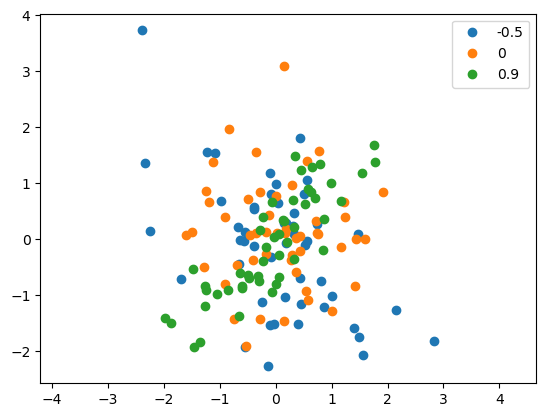

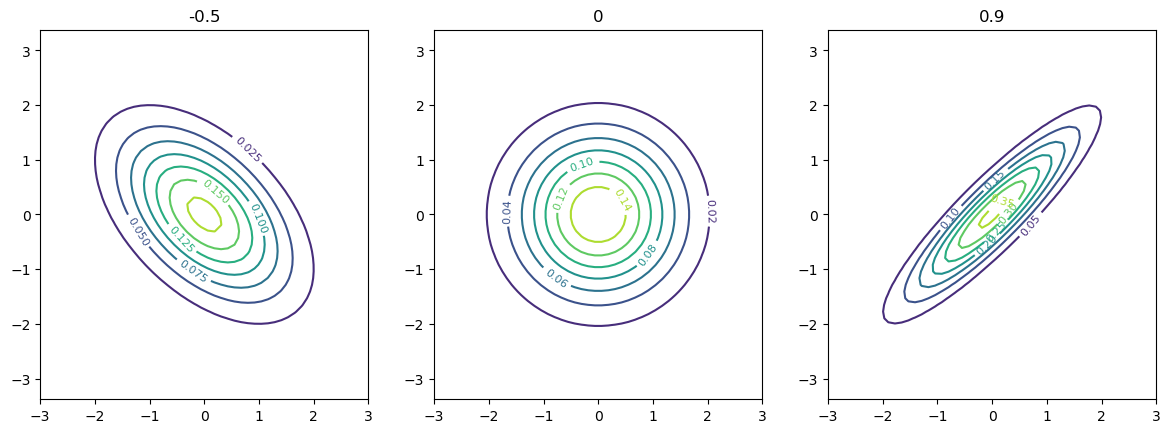

In [10]:
#TODO 6: plot multi-variate normal distributions with [0,0] as mean,
#        and with rho -0.5, 0, and 0.9. (keep the values sigma_1=1 and sigma_2=1 )

cov1 = covMatrix(1,1,-0.5)
cov2 = covMatrix(1,1,0)
cov3 = covMatrix(1,1,0.9)

doplots([[0,0],[0,0],[0,0]], [cov1, cov2, cov3], ["-0.5", "0", "0.9"])